# Experimental Results

In [12]:
# Import libraries.
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Set font properties.
font_path = plt.matplotlib.get_data_path() + "/fonts/ttf/cmr10.ttf"
cmfont = font_manager.FontProperties(fname=font_path)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = cmfont.get_name()
plt.rcParams["mathtext.fontset"] = "cm"

# Set font size.
plt.rcParams["font.size"] = 15

# Disable unicode minus.
plt.rcParams["axes.unicode_minus"] = False

# Use mathtext for axes formatters.
plt.rcParams["axes.formatter.use_mathtext"] = True

# General plotting.
palette = matplotlib.colormaps.get_cmap("tab20")(np.linspace(0, 1, 20))
std_alpha = 0.2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

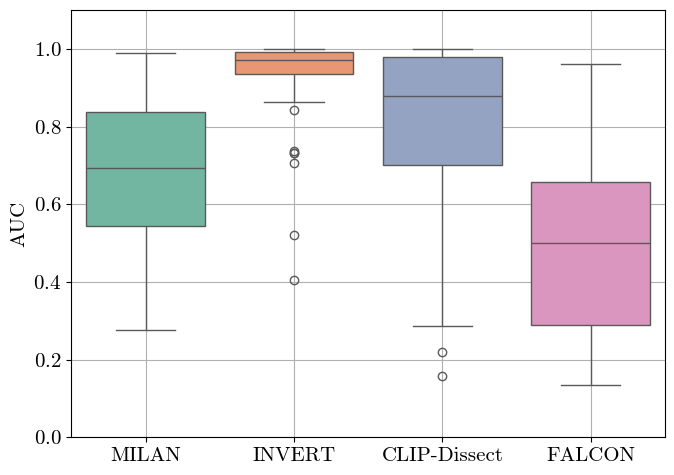

In [13]:
MODEL_NAME = (# "A50k_resnet18-fc"
              # "A50k_resnet18-avgpool" 
              "A50k_resnet18v1-layer4_val"
              # "A50k_vit16b-head"
              # "A50k_vit16b-layer11"
            )
PLOT_PATH = # "/path/to/plots/"
RESULT_PATH = "./results/"
df_falcon = pd.read_csv(RESULT_PATH+f"evaluation_FALCON_{MODEL_NAME}.csv")
df_milan = pd.read_csv(RESULT_PATH+f"evaluation_MILAN_{MODEL_NAME}.csv")
df_invert = pd.read_csv(RESULT_PATH+f"evaluation_INVERT_{MODEL_NAME}.csv")
df_clipdis = pd.read_csv(RESULT_PATH+f"evaluation_CLIP-Dissect_{MODEL_NAME}.csv")

# Combine DataFrames into a single DataFrame with a 'method' column
df_milan['method'] = 'MILAN'
df_invert['method'] = 'INVERT'
df_clipdis['method'] = 'CLIP-Dissect'
df_falcon['method'] = 'FALCON'

combined_df = pd.concat([df_milan, df_invert, df_clipdis,
                         df_falcon
                         ], ignore_index=True)

# Create a vertical boxplot using Seaborn
plt.figure(figsize=(7, 5))
sns.boxplot(x='method', y='auc', hue='method', data=combined_df, palette="Set2", legend=False)

# Set labels and title
plt.ylabel("AUC")
plt.xlabel("")
plt.ylim(0,1.1)

plt.grid(True)

plt.tight_layout()

# Save the plot
# plt.savefig(PLOT_PATH+f"method_auc_comparison_{MODEL_NAME}.png")
# plt.savefig(PLOT_PATH+f"method_auc_comparison_{MODEL_NAME}.pdf")
# plt.savefig(PLOT_PATH+f"method_auc_comparison_{MODEL_NAME}.svg")

# Show the plot
plt.show()